In [44]:
# Olivetti Faces dataset
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture

import numpy as np
import matplotlib.pyplot as plt

In [2]:
olivetti = fetch_olivetti_faces()
print(olivetti)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/chiragbangera/scikit_learn_data
{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], shape=(400, 4096), dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.3801

In [10]:
strat_split =  StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [11]:
# speeding things up usong pca

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(199)

In [15]:
k_range = range(5, 150, 5)
kmeans_per_k = [] # storing k models
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [23]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

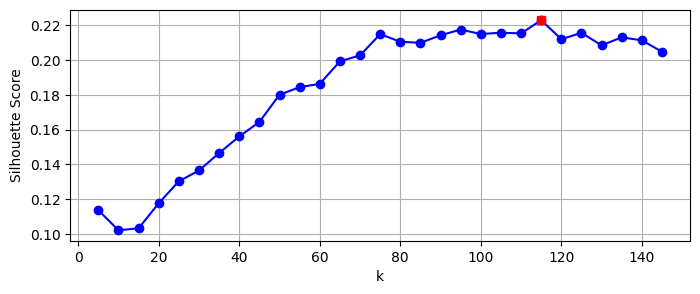

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.ylabel('Silhouette Score')
plt.xlabel('k')
plt.plot(best_k, best_score, 'rs')
plt.grid()
plt.show()

In [27]:
best_k

115

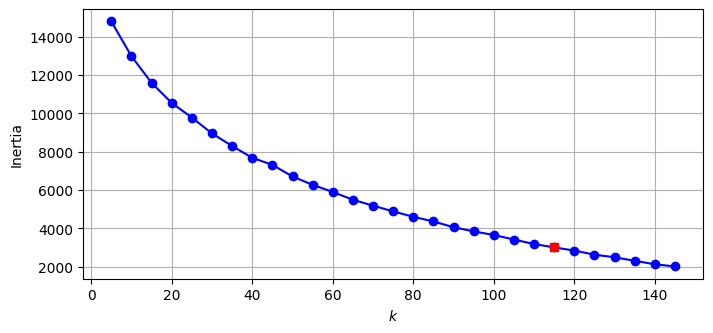

In [28]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [30]:
best_model = kmeans_per_k[best_index]

Cluster 0


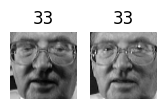

Cluster 1


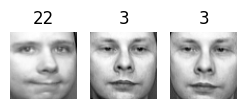

Cluster 2


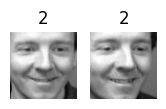

Cluster 3


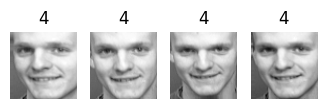

Cluster 4


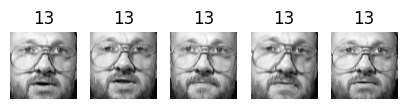

Cluster 5


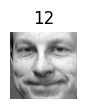

Cluster 6


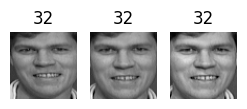

Cluster 7


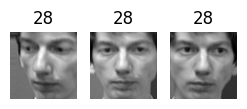

Cluster 8


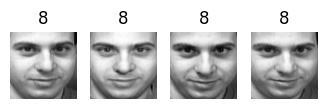

Cluster 9


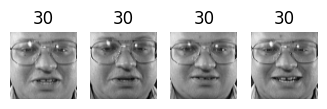

Cluster 10


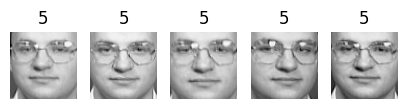

Cluster 11


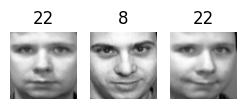

Cluster 12


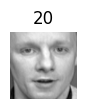

Cluster 13


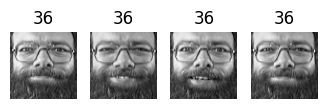

Cluster 14


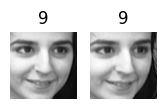

Cluster 15


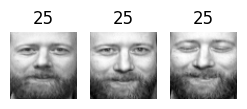

Cluster 16


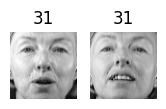

Cluster 17


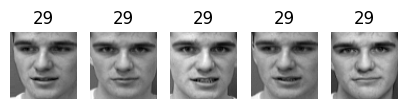

Cluster 18


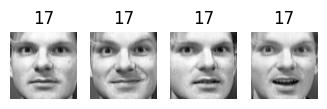

Cluster 19


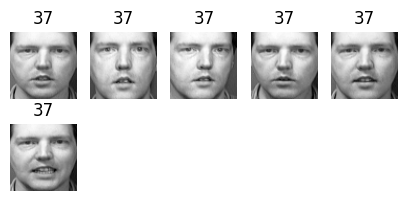

Cluster 20


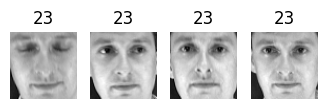

Cluster 21


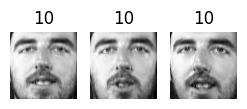

Cluster 22


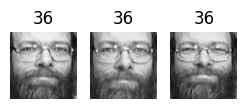

Cluster 23


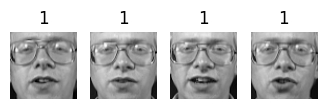

Cluster 24


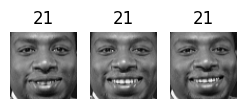

Cluster 25


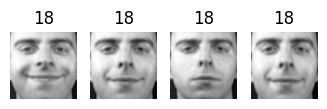

Cluster 26


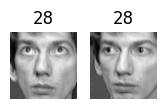

Cluster 27


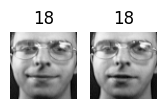

Cluster 28


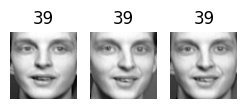

Cluster 29


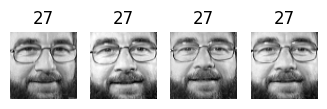

Cluster 30


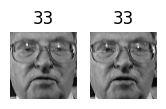

Cluster 31


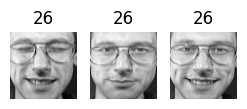

Cluster 32


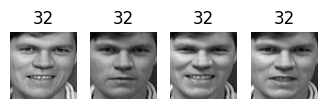

Cluster 33


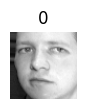

Cluster 34


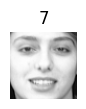

Cluster 35


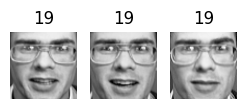

Cluster 36


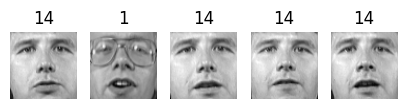

Cluster 37


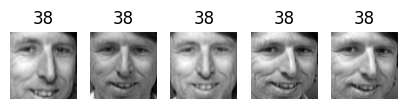

Cluster 38


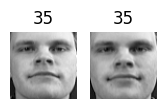

Cluster 39


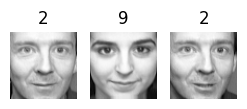

Cluster 40


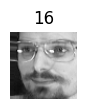

Cluster 41


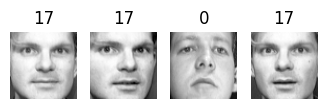

Cluster 42


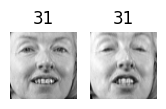

Cluster 43


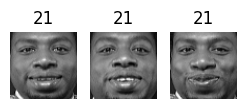

Cluster 44


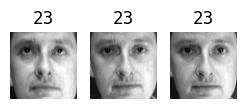

Cluster 45


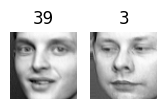

Cluster 46


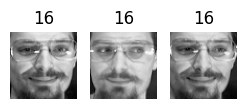

Cluster 47


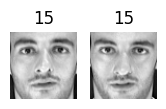

Cluster 48


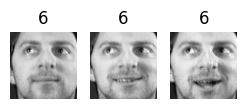

Cluster 49


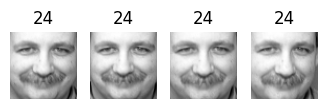

Cluster 50


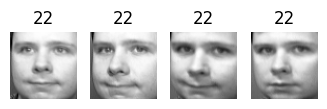

Cluster 51


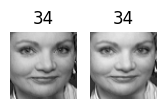

Cluster 52


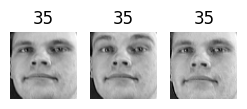

Cluster 53


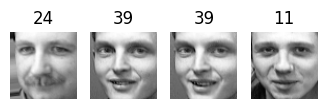

Cluster 54


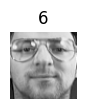

Cluster 55


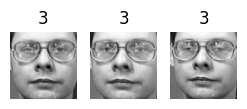

Cluster 56


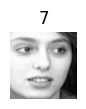

Cluster 57


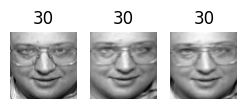

Cluster 58


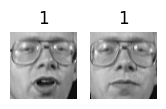

Cluster 59


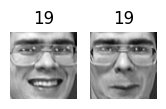

Cluster 60


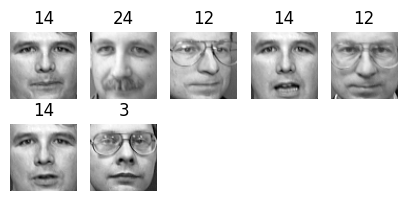

Cluster 61


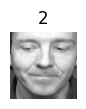

Cluster 62


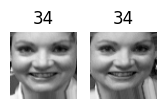

Cluster 63


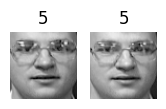

Cluster 64


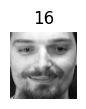

Cluster 65


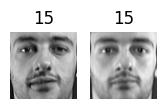

Cluster 66


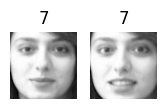

Cluster 67


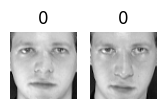

Cluster 68


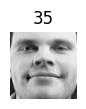

Cluster 69


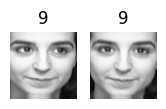

Cluster 70


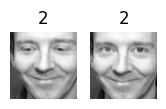

Cluster 71


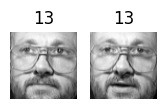

Cluster 72


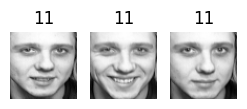

Cluster 73


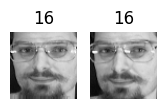

Cluster 74


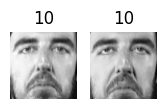

Cluster 75


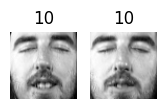

Cluster 76


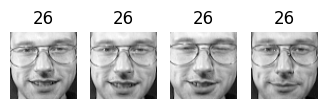

Cluster 77


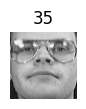

Cluster 78


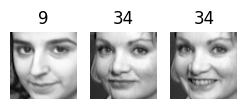

Cluster 79


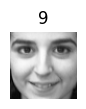

Cluster 80


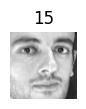

Cluster 81


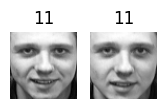

Cluster 82


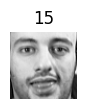

Cluster 83


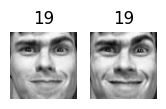

Cluster 84


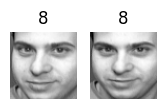

Cluster 85


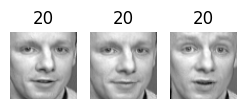

Cluster 86


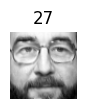

Cluster 87


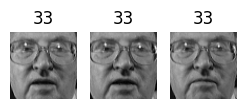

Cluster 88


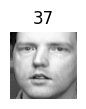

Cluster 89


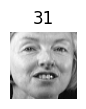

Cluster 90


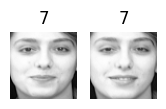

Cluster 91


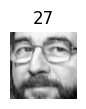

Cluster 92


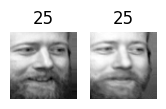

Cluster 93


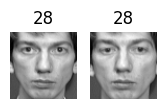

Cluster 94


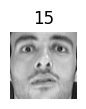

Cluster 95


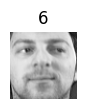

Cluster 96


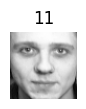

Cluster 97


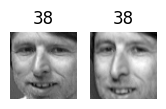

Cluster 98


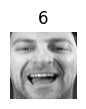

Cluster 99


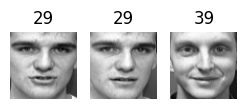

Cluster 100


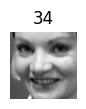

Cluster 101


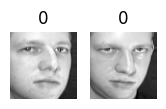

Cluster 102


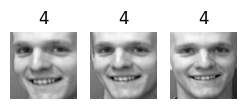

Cluster 103


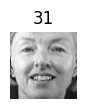

Cluster 104


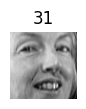

Cluster 105


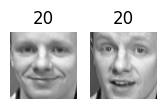

Cluster 106


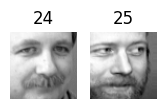

Cluster 107


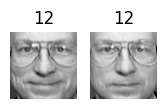

Cluster 108


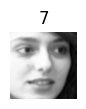

Cluster 109


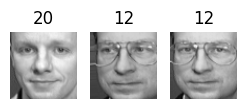

Cluster 110


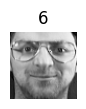

Cluster 111


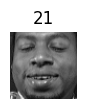

Cluster 112


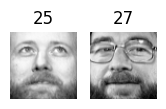

Cluster 113


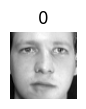

Cluster 114


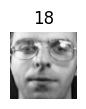

In [31]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [33]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca,y_valid)

0.925

In [39]:
# using kmeans dimentionality reduction toll, and train a classifer on the reduced set

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [40]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7125

In [42]:
# Search for the number of clusters that allows the classifier to tget he best performance: what performance can you reach

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters = n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.4875
15 0.5875
20 0.6125
25 0.65
30 0.6125
35 0.7125
40 0.6875
45 0.7375
50 0.725
55 0.725
60 0.7125
65 0.7
70 0.7
75 0.7375
80 0.7625
85 0.7
90 0.75
95 0.75
100 0.75
105 0.7625
110 0.75
115 0.7125
120 0.7875
125 0.7625
130 0.75
135 0.775
140 0.7125
145 0.725


In [43]:
# extending the dataset with the reduced features
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

In [45]:
# Gaussian Mixture model for the olivetti faces dataset

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [46]:
# using the model to generate somenew faces using the sample() method and visualize them
# if you used pca need to use inverse_transform() method

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

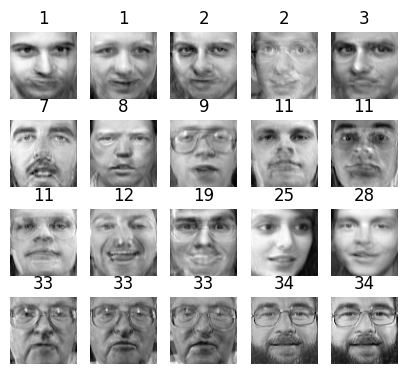

In [47]:
plot_faces(gen_faces, y_gen_faces)

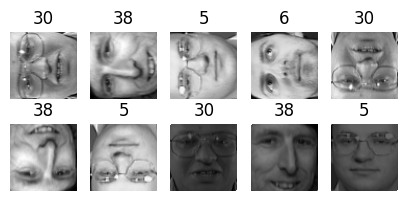

In [48]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [49]:
X_bad_faces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca)

array([-1.85963840e+07, -1.73014440e+07, -4.15207206e+07, -4.81261091e+07,
       -3.20478536e+07, -1.35426941e+07, -2.92374066e+07, -9.25150172e+07,
       -1.03272227e+08, -5.41695295e+07])

In [50]:
gm.score_samples(X_train_pca[:10])


array([1163.02020954, 1112.17308484, 1156.32132792, 1170.67602865,
       1073.69246152, 1139.89252914, 1113.76629963, 1073.69244913,
       1048.17522864, 1048.17520748])

In [51]:
# using dimentionality reduction techniques for anomaly detection

X_train_pca.round(2)

array([[ -3.78,   1.85,  -5.14, ...,   0.14,  -0.21,   0.06],
       [-10.15,   1.53,  -0.77, ...,  -0.12,  -0.14,  -0.02],
       [ 10.02,  -2.88,  -0.92, ...,  -0.07,  -0.  ,   0.12],
       ...,
       [ -2.48,  -2.96,   1.3 , ...,   0.02,   0.03,  -0.15],
       [  3.22,  -5.35,   1.39, ...,  -0.06,  -0.23,   0.16],
       [  0.92,   3.65,   2.26, ...,  -0.14,  -0.07,   0.06]],
      shape=(280, 199), dtype=float32)

In [52]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [53]:
reconstruction_errors(pca, X_train).mean()

np.float32(0.00019205351)

In [54]:
reconstruction_errors(pca, X_bad_faces).mean()

np.float32(0.004707354)

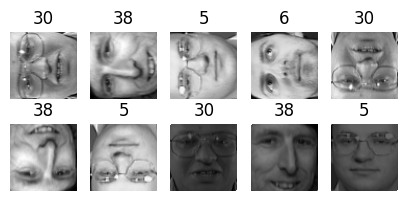

In [55]:
plot_faces(X_bad_faces, y_bad)

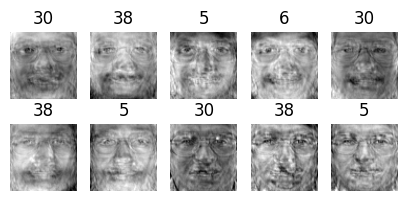

In [56]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)